In [1]:
import numpy as np

from registration_framework import Registration
from optims.cmaes_optim import CMAES
from optims.pso_optim import PSO_optim
from optims.ppso_optim import PPSO_optim
from optims.ppso_optim_improved1 import PPSO_optim1, PPSO_optim2, PPSO_optim3, PPSO_optim1_1
from utils.tools import Tools
from optim_test_fun import OptimFunTest

# 进行图像匹配的操作
config = Tools.load_yaml_config("configs/optim_test_config.yaml")
res_path = f"{config.data_save_path}/{config.record_id}"
file_name = f"{config.record_id}_config.yaml"
Tools.save_obj_yaml(res_path, file_name, config)

run_times = config.run_times

In [ ]:
# 设置随机种子
# print(np.random.uniform(-1, 20, 2))

# 运行测试函数
test_fun_framework = OptimFunTest(config)

for i in range(run_times):
    rand_seed = config.rand_seed + i
    # 每一次迭代随机种子+1，这样的方式保证结果的一致
    np.random.seed(rand_seed)
    optim = PPSO_optim(config)
    optim.set_runid(i)
    test_fun_framework.set_fitness_obj(optim)
    optim.run_std_optim()

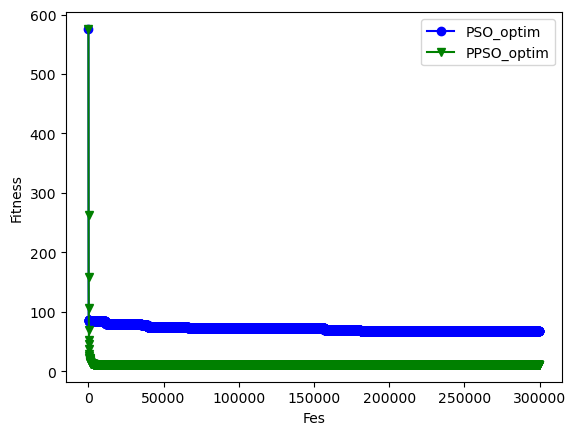

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 绘制图像，读取多条数据，然后取中位数
method_names = [PSO_optim.__name__, PPSO_optim.__name__]

# STEP：
# （1）读取文件，根据文件名（record_id_methodname_optim_fes_i）
# （2）每个方法都用其类名整一个索引
# （3）绘制收敛图
csv_path = f"D:/workspace/ml-workspace/registration/result/optim"

data_dict = {}
data_show = {}
for method_name in method_names:
    data_dict.setdefault(method_name, [])

record_id = config.record_id
for i in range(run_times):
    for method_name in method_names:
        file_path = f"{csv_path}/{config.record_id}/{method_name}_fes_{i}.csv"
        csv_datas = pd.read_csv(file_path)
        fes = csv_datas['FEs'].values
        fitness = csv_datas['fitness'].values
        data_dict.get(method_name).append(fitness)

j = 0
for method_name in method_names:
    data_list = data_dict.get(method_name)
    np_arr = np.stack(data_list)
    med = np.median(np_arr, axis=0)
    data_show.setdefault(method_name, med)
    plt.plot(fes, med, label=method_name, color=config.colors[j], marker=config.markers[j])
    j+=1

plt.xlabel('Fes')
plt.ylabel('Fitness')
plt.legend()

# 显示图像
plt.show()



